In [50]:
%matplotlib inline
import numpy as np, pandas as pd
import ipyvolume

In [90]:
def padcrop_vol(vol, newshape=[360, 360, 360]):
    vol2 = np.array(vol)
    shape = vol.shape
    z, y, x = shape
    mids = [d // 2 for d in shape]
    for dim in range(3):
        if shape[dim] < newshape[dim]:
            pad_amt = (newshape[dim] - shape[dim]) // 2
            parity = (shape[dim] & 1) ^ (newshape[dim] & 1)
            pad_tup = (pad_amt, pad_amt + parity) # 
            pad_list = [(0,0), (0,0), (0,0)]
            pad_list[dim] = pad_tup
            vol2 = np.pad(vol2, pad_list, mode='constant', constant_values=0)
        if shape[dim] > newshape[dim]:
            slc_amt = (shape[dim] - newshape[dim]) // 2
            parity = (shape[dim] & 1) ^ (newshape[dim] & 1)
            slc_tup = (slc_amt, shape[dim] - slc_amt - parity) # 
            null1, vol2, null2 = np.split(vol2, slc_tup, dim)

    return vol2

In [91]:
a = np.ones((15,100,33))
b = padcrop_vol(a, [50,50,50])
b.shape

(50, 50, 50)

##### c = np.split(b, [3,47])
[n.shape for n in c] 

In [87]:
ipyvolume.quickvolshow(b)

/home/mike/ve/ml/lib/python3.5/site-packages/ipyvolume/serialize.py:21: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


In [23]:
s1 = 91
s2 = 102
pad_amt = (s2 - s1) // 2
s3 = s1 + 2*pad_amt + ((s1 & 1) ^ (s2 & 1))
print(pad_amt, s3, s2 == s3)

5 102 True


In [9]:
400**3 / 1e6

64.0

In [2]:
shapes = pd.read_csv('/media/mike/tera/data/databowl/shapes.csv')
shapes.head()

,id,z,y,x
0,0015ceb851d7251b8f399e39779d1e7d,390,355,355
1,0030a160d58723ff36d73f41b170ec21,331,298,298
2,003f41c78e6acfa92430a057ac0b306e,350,414,414
3,006b96310a37b36cccb2ab48d10b49a3,346,340,340
4,008464bb8521d09a42985dd8add3d0d2,292,370,370


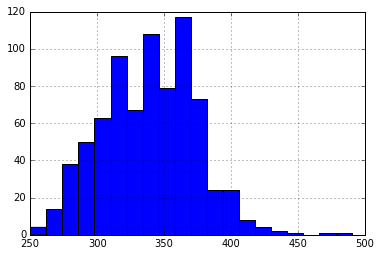

In [6]:
shapes['x'].hist(bins=20)

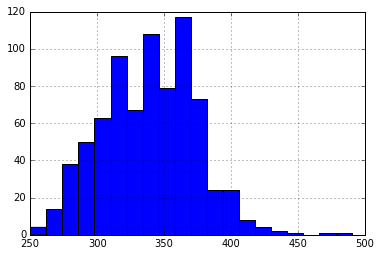

In [7]:
shapes['y'].hist(bins=20)

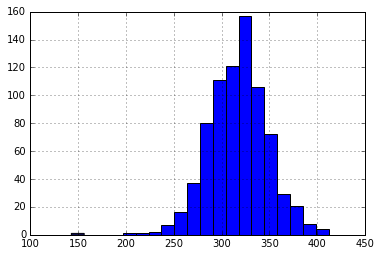

In [8]:
shapes['z'].hist(bins=20)

In [24]:
a = np.arange(10)
b = np.array(a)

In [25]:
b[2] = 42
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
b

array([ 0,  1, 42,  3,  4,  5,  6,  7,  8,  9])